# Python Web crawler of IMDB data Part 4:

## Extraction and exploratory data analysis of 1930-2018 IMDB film data with sample excluding metascores; data analysis, plots, and more about the importance of outliers in a sample!

The following code, similar to the web crawler that extracted data only for films that have metascore ratings, uses a web crawler to extract IMDB data from an even longer period, given this sample does not exclude IMDB films that do not have metascore ratings. 

As I found out after extracting the data and performed some boxplots, 2 variables (film length and the number of IMDB votes) have substantial outliers, in some cases outliers both well above and well below the median. 

Before moving on, though, it's worth asking: what are outliers? How are they measured or identified? 

Boxplots provide perhaps one of the easiest univariate methods to identify and visually display outliers (for a particular variable). Outliers can be either well above the variable's values within the 3rd quartile or well below the values within the 1st quartile. Also relevant to this distinction is the interquartile range (IQR): i.e., the distance between the 3rd and 1st quartiles. 

Mathematically, outliers are defined as: a.) 1.5*IQR + Q3; or b.) Q1 - 1.5 * IQR.

Boxplots are especially convenient since any asterisk-like icons lying outisde of the box plot are shown as outliers (either above or below the median). 

In [8]:
#import requests library
import requests

#import the get module for requesting web content
from requests import get

#import bs4 library for extracting the data from the HTML code
from bs4 import BeautifulSoup

#import libraries to provide different amounts of waiting time between URL requests by Python
from time import time
from time import sleep
from random import randint

from IPython.core.display import clear_output

from warnings import warn

warn("Warning Simulation")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Warning Simulation


In [9]:
#Set up the number of pages in which data will be extracted from each year: i.e., first 10 pages
page_range = [str(i) for i in range(1,11)]

#Set up the film release date parameter range from the IMDB site: namely, the 88 year period of 1930 to 2018
year_range = [str(i) for i in range(1930,2019)]

In [10]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

## Web crawler loop: extract data to empty lists for each variable

In [11]:
#web crawler script:

#Create empty lists to contain the data that will be extracted from the IMDB site
genres = []
lengths = []
names = []
year_released = []
imdb_ratings = []
n_votes = []



#Initialize monitoring of the web crawler loop
start_t = time()
requests = 0

#Implement loop for each year in the range of 1930 to 2018
for year in year_range:

    # For each page from 1-10 for each given year
    for page in page_range:

        #implement a URL get request 
        response = get('http://www.imdb.com/search/title?release_date=' + year + 
        '&sort=num_votes,desc&page=' + page, headers = headers)

        #Pause the loop at pseudo-random intervals
        sleep(randint(8,15))

        # Monitor the get requests
        requests += 1
        elapsed_t = time() - start_t
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_t))
        clear_output(wait = True)

        #Show a warning if there is a non-200 status error
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        #Stop the loop if the # of requests is larger than was requested/specified
        if requests > 5000:
            warn('Number of requests was greater than expected.')  
            break 

        #Use the bs4 libary to Pparse the HTML content of the URL request
        page_html = BeautifulSoup(response.text, 'html.parser')

        # On each webpage, select the data for each of the 50 films
        films = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For each movie of these 50
        for film in films:
            #iterate on each film so long as there is an IMDB rating for it
            if film.strong.text is not None:
            
                #iterate and extract data for the year the film was released
                y = film.h3.find('span', class_ = 'lister-item-year').text
                #append these data to the year_released list
                year_released.append(y)

                #iterate on the film names
                n = film.h3.a.text
                names.append(n)

                #iterate on genresg = film.find('span', class_ = 'genre').text
                
                #assign to g as a slice to get only the name of genre (i.e., delete first 2 characters)
                g = g[1:]
                #Multiple genres are listed for some films, with commas in between 
                #Thus, split the genres by comma, and then only keep the first element before the first comma
                g = g.split(',')[0]
                #Before appending to genres list, delete any empty space trailing after the actual genre name
                g = g.strip()
                #Having done the needed data cleaning, append the data to the genres list
                genres.append(g)

                #itereate on film lengths
                l = film.find('span', class_='runtime').text
                #slice the data to keep only the characters that actually contain the numeric data                
                l = l[:-3]
                #convert the film lengths data from string to integer
                l2 = int(l)
                #append the data to the lengths list
                lengths.append(l2)

                #iterate on IMDB ratings
                i = float(film.strong.text)
                imdb_ratings.append(i)

                #finally, itereate on number of IMDB votes
                v = film.find('span', attrs = {'name':'nv'})['data-value']
                n_votes.append(int(v))


Request:890; Frequency: 0.08096589108099689 requests/s


In [15]:
#inspect elements of lengths to see whether the data have been cleaned properly: i.e., only numeric data
lengths

[136,
 104,
 97,
 63,
 92,
 92,
 127,
 75,
 25,
 125,
 90,
 89,
 84,
 73,
 85,
 96,
 28,
 87,
 21,
 19,
 108,
 69,
 21,
 75,
 20,
 26,
 30,
 96,
 21,
 79,
 90,
 20,
 72,
 92,
 93,
 76,
 93,
 99,
 78,
 92,
 93,
 99,
 83,
 116,
 99,
 85,
 72,
 71,
 76,
 113,
 136,
 104,
 97,
 63,
 92,
 92,
 127,
 75,
 25,
 125,
 90,
 89,
 84,
 73,
 85,
 96,
 28,
 87,
 21,
 19,
 108,
 69,
 21,
 75,
 20,
 26,
 30,
 96,
 21,
 79,
 90,
 20,
 72,
 92,
 93,
 76,
 93,
 99,
 78,
 92,
 93,
 99,
 83,
 116,
 99,
 85,
 72,
 71,
 76,
 113,
 136,
 104,
 97,
 63,
 92,
 92,
 127,
 75,
 25,
 125,
 90,
 89,
 84,
 73,
 85,
 96,
 28,
 87,
 21,
 19,
 108,
 69,
 21,
 75,
 20,
 26,
 30,
 96,
 21,
 79,
 90,
 20,
 72,
 92,
 93,
 76,
 93,
 99,
 78,
 92,
 93,
 99,
 83,
 116,
 99,
 85,
 72,
 71,
 76,
 113,
 136,
 104,
 97,
 63,
 92,
 92,
 127,
 75,
 25,
 125,
 90,
 89,
 84,
 73,
 85,
 96,
 28,
 87,
 21,
 19,
 108,
 69,
 21,
 75,
 20,
 26,
 30,
 96,
 21,
 79,
 90,
 20,
 72,
 92,
 93,
 76,
 93,
 99,
 78,
 92,
 93,
 99,
 83,
 116,
 99

In [2]:
#Import pandas library to be able to merge the various lists into a dataframe, and perform some data cleaning

import pandas as pd

# Import data via Pandas: data cleaning 

In [37]:
imdb_data = pd.DataFrame({'name':names,
                         'year': year_released,
                         'length': lengths,
                         'genre':genres,
                         'imdb_rating':imdb_ratings,
                         'n_votes':n_votes})
#Sanity check: inspect the data imported into the dataframe, to make sure it looks correct
imdb_data

,name,year,length,genre,imdb_rating,n_votes
0,All Quiet on the Western Front,(1930),136,Drama,8.1,52716
1,The Blue Angel,(1930),104,Drama,7.8,12138
2,Animal Crackers,(1930),97,Comedy,7.6,12059
3,L'Age d'Or,(1930),63,Comedy,7.4,11235
4,Murder!,(1930),92,Crime,6.4,4954
5,Morocco,(1930),92,Drama,7.2,4746
6,Hell's Angels,(1930),127,Drama,7.7,4372
7,Earth,(1930),75,Drama,7.4,4180
8,À Propos de Nice,(1930),25,Documentary,7.5,3320
9,The Big Trail,(1930),125,Adventure,7.2,2970


In [113]:
#show data types of each variable/column
imdb_data.dtypes

name            object
year             int64
length           int64
genre           object
imdb_rating    float64
n_votes          int64
dtype: object

Notice that year is an object, so this needs to be cleaned and converted to integer.

The following code worked for the 1930-2017 notebook's data- i.e., the dataset with metascores). However, this code returned an error since at least one of the rows of data could not be successfully cleaned and converted to integer.

imdb_data.loc[:, 'year'] = imdb_data['year'].str[-5:-1].astype(int)

The reason for this issue is sometimes not evident, so let's examine all of the unique values for the year variable.

In [45]:
#show all unique values of the year column
imdb_data['year'].unique()

array(['(1930)', '(I) (1930)', '(II) (1930)', '(1931)', '(I) (1931)',
       '(1932)', '(I) (1932)', '(1933)', '(1934)', '(1935)', '(1936)',
       '(1937)', '(1938)', '(1939)', '(1940)', '(1941)', '(I) (1941)',
       '(1942)', '(1943)', '(I) (1943)', '(1944)', '(1945)', '(1946)',
       '(1947)', '(1948)', '(1949)', '(1966–1973)', '(1950)', '(1951)',
       '(1951–1957)', '(1952)', '(1952–1958)', '(1953)', '(1954)',
       '(1955)', '(1955–1962)', '(1955–1975)', '(1955–1956)', '(1956)',
       '(1957)', '(1957–1963)', '(1957– )', '(1957–1966)', '(1958)',
       '(1958–1966)', '(1959)', '(1959–1964)', '(1959–1973)',
       '(I) (1959)', '(II) (1959)', '(1960)', '(1960–1966)',
       '(1960–1975)', '(1960–1968)', '(1960–1962)', '(1960– )', '(1961)',
       '(1961–1988)', '(1961–1966)', '(1961–1962)', '(1961–1969)',
       '(1962)', '(1962–1963)', '(1962–1971)', '(1962–1969)', '(1963)',
       '(1963–1989)', '(1963–1965)', '(1963 TV Short)', '(1964)',
       '(1964 TV Movie)', '(1964–19

Notice that some rows of data show a range of years, instead of just a single year. Thus, some of the data include not just films, but also TV shows, which of course usually run beyond more than a single year. Notice that some data entries even specify a specific category, such as "TV Movie", next to the year. 

This also means that there are actually some duplicates in the data, so these will need to be deleted. 

In [22]:
#check back on the year's unique values
imdb_data['year'].unique()

array(['(1930)', '(I) (1930)', '(II) (1930)', '(1931)', '(I) (1931)',
       '(1932)', '(I) (1932)', '(1933)', '(1934)', '(1935)', '(1936)',
       '(1937)', '(1938)', '(1939)', '(1940)', '(1941)', '(I) (1941)',
       '(1942)', '(1943)', '(I) (1943)', '(1944)', '(1945)', '(1946)',
       '(1947)', '(1948)', '(1949)', '(1966–1973)', '(1950)', '(1951)',
       '(1951–1957)', '(1952)', '(1952–1958)', '(1953)', '(1954)',
       '(1955)', '(1955–1962)', '(1955–1975)', '(1955–1956)', '(1956)',
       '(1957)', '(1957–1963)', '(1957– )', '(1957–1966)', '(1958)',
       '(1958–1966)', '(1959)', '(1959–1964)', '(1959–1973)',
       '(I) (1959)', '(II) (1959)', '(1960)', '(1960–1966)',
       '(1960–1975)', '(1960–1968)', '(1960–1962)', '(1960– )', '(1961)',
       '(1961–1988)', '(1961–1966)', '(1961–1962)', '(1961–1969)',
       '(1962)', '(1962–1963)', '(1962–1971)', '(1962–1969)', '(1963)',
       '(1963–1989)', '(1963–1965)', '(1963 TV Short)', '(1964)',
       '(1964 TV Movie)', '(1964–19

Given the makeup of the data, it appears that slicing will not necessarily work properly. It would work for most of the data points, but not all of them, since some of the observations are specified differently. 

Instead, regex functions will be needed to parse the year column data properly.

In [25]:
#import regular expression (regex) library for parsing the year column
import re

For demonstration purposes, a string variable will be created with one of the rows from the year column. A regex function will be applied on it to text whether the data has been parsed/cleaned properly. 

In [85]:
#create string variable with similar format as one of the rows for the year column
st = '2018-'

#for demonstration purposes, apply a regex function to parse only the year data (first 4 digits) of string st
re.findall(r'\d{4}', st)

['2018']

The regex function appears to work properly.

Since this regex function cannot be applied directly to the year column, a separate function must be defined specifying the particular regex function. 

Now proceed with defining a function for applying the regex function shown above, and use .apply() method to use the function on the year column.

In [86]:
#define a function for specifying the regex function
def splitting(year):
    s = re.findall(r'\d{4}', year)
    if s:
        #return only the first set of results: i.e., the first year that's listed in each row of the year column
        return(s[0])

#apply the "splitting" regex function to the year column, and assign/save this in the column
imdb_data['year']  = imdb_data['year'].apply(splitting)

In [87]:
#sanity check: showthe unique elements of the year column, and see whether the regex function 'fixed' the issue
imdb_data['year'].unique()

array(['1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937',
       '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945',
       '1946', '1947', '1948', '1949', '1966', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'], dtype=object)

Since the year column data are now parsed properly, the data can now be converted to integer.

In [88]:
#convert the year column to integer
imdb_data['year'] = imdb_data['year'].astype(int)

In [89]:
#show the data types for each column
imdb_data.dtypes

Unnamed: 0       int64
name            object
year             int64
length           int64
genre           object
imdb_rating    float64
n_votes          int64
dtype: object

In [3]:
#export the data to ensure the dataset is saved without having to reimplement the web crawler
imdb_data.to_csv('imdb_data_1930-2018.csv')

Now, in a new session, re-import the IMDB data from the CSV file.

In [2]:
#re-import pandas and import various other data analysis libraries
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

#re-import the data as a DataFrame
imdb_data = pd.read_csv('imdb_1930-2018.csv')
imdb_data.head(10)

,Unnamed: 0,Unnamed: 0.1,name,year,length,genre,imdb_rating,n_votes
0,0,0,All Quiet on the Western Front,1930,136,Drama,8.1,52716
1,1,1,The Blue Angel,1930,104,Drama,7.8,12138
2,2,2,Animal Crackers,1930,97,Comedy,7.6,12059
3,3,3,L'Age d'Or,1930,63,Comedy,7.4,11235
4,4,4,Murder!,1930,92,Crime,6.4,4954
5,5,5,Morocco,1930,92,Drama,7.2,4746
6,6,6,Hell's Angels,1930,127,Drama,7.7,4372
7,7,7,Earth,1930,75,Drama,7.4,4180
8,8,8,À Propos de Nice,1930,25,Documentary,7.5,3320
9,9,9,The Big Trail,1930,125,Adventure,7.2,2970


In [3]:
#2 extra columns were created that do not contain any actual data
#delete these 2 columns
imdb_data = imdb_data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [4]:
#drop any duplicate rows of data
imdb_data = imdb_data.drop_duplicates()
imdb_data

,name,year,length,genre,imdb_rating,n_votes
0,All Quiet on the Western Front,1930,136,Drama,8.1,52716
1,The Blue Angel,1930,104,Drama,7.8,12138
2,Animal Crackers,1930,97,Comedy,7.6,12059
3,L'Age d'Or,1930,63,Comedy,7.4,11235
4,Murder!,1930,92,Crime,6.4,4954
5,Morocco,1930,92,Drama,7.2,4746
6,Hell's Angels,1930,127,Drama,7.7,4372
7,Earth,1930,75,Drama,7.4,4180
8,À Propos de Nice,1930,25,Documentary,7.5,3320
9,The Big Trail,1930,125,Adventure,7.2,2970


Notice the sample size has been dramatically reduced down to 4494 observations. 

Some of the rows pertain to TV shows that are listed in multiple years, or there were duplicate films in many cases, especially for older periods in cinematic history (e.g., the early to mid 1930s perhaps). 

In [5]:
#now, reset the index given that, due to dropping the duplicates, the index is no longer accurate
imdb_data = imdb_data.reset_index(drop=True)

imdb_data

,name,year,length,genre,imdb_rating,n_votes
0,All Quiet on the Western Front,1930,136,Drama,8.1,52716
1,The Blue Angel,1930,104,Drama,7.8,12138
2,Animal Crackers,1930,97,Comedy,7.6,12059
3,L'Age d'Or,1930,63,Comedy,7.4,11235
4,Murder!,1930,92,Crime,6.4,4954
5,Morocco,1930,92,Drama,7.2,4746
6,Hell's Angels,1930,127,Drama,7.7,4372
7,Earth,1930,75,Drama,7.4,4180
8,À Propos de Nice,1930,25,Documentary,7.5,3320
9,The Big Trail,1930,125,Adventure,7.2,2970


## Exploratory data analysis, plots, and summary stats

As with the previous notebook, which examined both IMDB and metascore data, various summary statistics and plots will be implemented in this notebook for most of the same variables except, of course, metascores.

Given that each era now has a sizable sample of films' data, one can more readily compare user ratings, film lengths, and ratings by genre over time. For example, we can now examine whether film lengths have stayed the same, increased, or decreased over time, on average. We can also examine whether IMDB users tend to perceive older films in a more or less flattering light, relative to more recent films. Genres can also be compared  more readily over time.

Let's start by examining the distribution of the various numeric variables.

Then, we'll proceed with examining various summary statistics, including the object/string variables such as genre. 

First, convert the imdb ratings to a scale out of 100, and then implement a boxplot of the imdb ratings data.

In [6]:
#for sake of ease of readability, create a new column of imdb ratings converted to a 100 point scale
imdb_data['imdb_ratings_100'] = imdb_data['imdb_rating'] *10
imdb_data.head(10)

,name,year,length,genre,imdb_rating,n_votes,imdb_ratings_100
0,All Quiet on the Western Front,1930,136,Drama,8.1,52716,81.0
1,The Blue Angel,1930,104,Drama,7.8,12138,78.0
2,Animal Crackers,1930,97,Comedy,7.6,12059,76.0
3,L'Age d'Or,1930,63,Comedy,7.4,11235,74.0
4,Murder!,1930,92,Crime,6.4,4954,64.0
5,Morocco,1930,92,Drama,7.2,4746,72.0
6,Hell's Angels,1930,127,Drama,7.7,4372,77.0
7,Earth,1930,75,Drama,7.4,4180,74.0
8,À Propos de Nice,1930,25,Documentary,7.5,3320,75.0
9,The Big Trail,1930,125,Adventure,7.2,2970,72.0


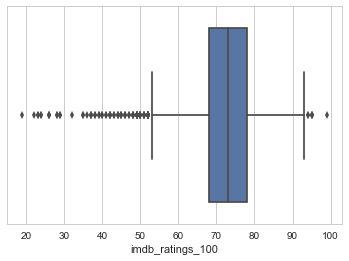

In [33]:
#use a white grid in background for the boxplot
sns.set(style = "whitegrid")

#First plot: boxplot of IMDB ratings, transformed to be out of 100 points possible: i.e., imdb_rating_100
fig_box = sns.boxplot(imdb_data['imdb_ratings_100'])

Notice the median hovers around 7.3-7.4, which is similar to, and surprisingly a bit higher than, that of the 1936-2017 dataset. The rest of the distribution, while somewhat similar, is fairly different . The similarities include that there are many outliers on the low-end of the imdb ratings distribution, but, even so, there are more substantial outliers in this sense.

There are several notable contrasts with that of the other dataset.For example, the overall range of this dataset's imdb ratings varies more widely than in the other dataset. The lowest imdb ratings are about 10 points lower than the other dataset.

In addition, unlike the other distribution, there are also notable outliers on the high-end of the imdb ratings distribution. 

Now, examine a boxplot and histogram to see the distribution of the film length data.

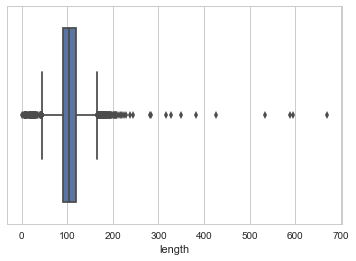

In [39]:
#boxplot of film length
fig_box = sns.boxplot(imdb_data['length'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


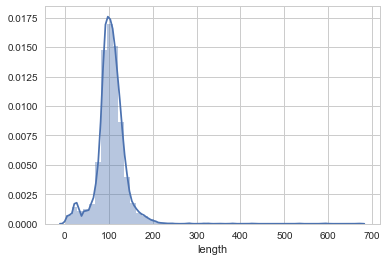

In [40]:
#histogram of film length data
fig_box = sns.distplot(imdb_data['length'])

As both plots show, the film length varies dramatically, with a large amount of outliers well below the median and mean. 

There are also quite a few outliers above the mean, including several extreme outliers that far exceed the median and mean. A few of the films are so long that they would take literally an entire day to watch (e.g., "I, Claudius, which is a whopping 669 minutes in length). 

Finally, let's examine a boxplot and histogram of the IMDB votes data.

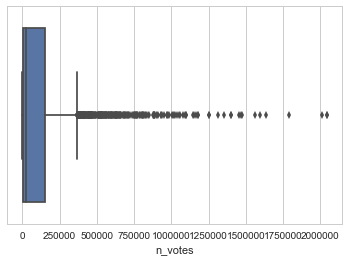

In [42]:
#boxplot of the number of IMDB votes
fig_box = sns.boxplot(imdb_data['n_votes'])

#notice this boxplot reveals an extremely skewed distribution. Positive outliers extend way above the mean. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


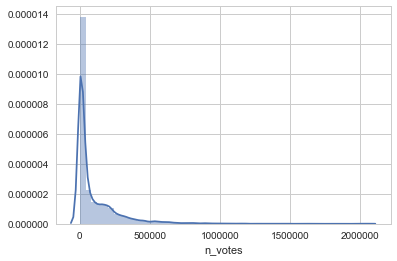

In [43]:
#show histogram
fig_box = sns.distplot(imdb_data['n_votes'])


As shown by both plots, the number of IMDB votes varies very widely. This makes sense, though, since the IMDB database includes a very large and extensive number of films, inclding some films that, even among some film buffs, are fairly obscure.

While some films have more than 1 million votes, these are clearly far fewer in number relative to the films that have several thosands to tens of thousands of votes.

Now, let's continue by examining summary statistics. 

Let's start with the object variables.

In [45]:
#Show the summary statistics for the object/string variables: i.e., name and genre
imdb_data.describe(include='object')

,name,genre
count,4494,4494
unique,4313,21
top,The Mummy,Comedy
freq,4,1027


Notice that the most popular genre for this dataset actually differs from the other dataset (with the metascore variable). Instead of Action films, Comedy films are actually the most popular. 

Also, this dataset contains 2 additional genres in the datasets: i.e., 21 instead of 19. 

Now, examine the numeric variables.

In [24]:
#show summary statistics of the numeric variables (i.e., the default option of the describe() method)
imdb_data.describe()

,year,length,imdb_rating,n_votes,imdb_ratings_100
count,4494.000000,4494.000000,4494.000000,4.494000e+03,4494.000000
mean,1974.123275,104.886515,7.246951,1.093293e+05,72.469515
std,25.649583,34.697857,0.795334,1.868186e+05,7.953338
min,1930.000000,2.000000,1.900000,5.610000e+02,19.000000
25%,1952.000000,90.000000,6.800000,6.169250e+03,68.000000
50%,1974.000000,104.000000,7.300000,2.595700e+04,73.000000
75%,1996.000000,120.000000,7.800000,1.505230e+05,78.000000
max,2018.000000,669.000000,9.900000,2.043544e+06,99.000000


While the film lengths vary much more widely in this sample, the mean of the films in this dataset is actually about 10 minutes shorter than the dataset with metascores.

The statistics for the number of votes also varies quite a bit relative to the other dataset. While the mean is still quite high, it's only half that of the other dataset. The standard deviation is also substantially higher vs this dataset's mean than that of the other dataset, showing a much wider variance in the number of IMDB votes. These statistics are not terribly surprising, however, after considering that the other dataset contains only films that also have metascores.

A sufficiently high number of critic reviews would be less likely for films that are relatively obscure, so this likely feeds in to the average number of IMDB votes as well as the film lengths (more films that are not at one extreme or the other in terms of length).

One might also wonder how film ratings have changed over time, compared by genre. For this dataset, comparing the ratings over time is much more viable than for the other dataset, since the other sample excluded so many films from the earlier decades (1930s, '40s, etc.) of the sample.

As with the code for the other dataset, the groupby() and agg() methods must be chained in order to calculate the mean, median, etc. 

In [12]:
#How do film ratings compare by genre?

#use groupby() method to group the data based on genre
#Also, chain the .agg() method to calculate the various statistics
imdb_data.groupby(['genre'])['imdb_rating'].agg(['count','sum','mean','median', 'std', 'max', 'min'])

,count,sum,mean,median,std,max,min
genre,,,,,,,
Action,850,5869.0,6.904706,6.90,0.824093,9.9,2.6
Adventure,366,2596.8,7.095082,7.20,0.934940,9.0,2.2
Animation,226,1711.3,7.572124,7.60,0.637894,9.3,6.1
Biography,196,1478.3,7.542347,7.60,0.518571,8.9,5.8
Comedy,1027,7418.1,7.223077,7.30,0.728334,9.4,2.6
Crime,418,3139.3,7.510287,7.50,0.628778,9.5,2.4
Documentary,31,240.5,7.758065,7.90,0.893970,9.4,5.5
Drama,979,7330.0,7.487232,7.60,0.655783,9.3,2.8
Family,10,74.0,7.400000,7.50,0.522813,8.2,6.5


The overall stats are similar to that of the other dataset, with the main exception being that most genres have a somewhat larger number of films represented in this dataset. Documentaries still have the highest mean and median IMDB rating, but Biography, Film-Noir, Family, Drama, Mystery, and Animation films also are rated quite highly. 

Now, let's examine several scatter plots showing correlations between some of the variables, and then show some scatter plots of the data over time.

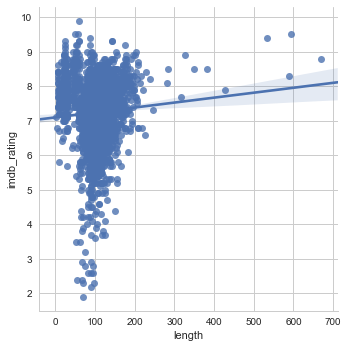

In [48]:
#imlement a scatterplot of film length and imdb_rating
#The light-blue/gray shaded areas surrounding the best-fit line indicate a 95% Confidence interval range.
sns.lmplot(x='length',y= 'imdb_rating', data=imdb_data)

Interestingly, while there is still a bit of a positive correlaiton between film length and IMDB ratings, the correlation is far more slight than for the other dataset. The correlation is even less strong when considering that part of this relationship appears to be driven by outliers with very high film lengths. 

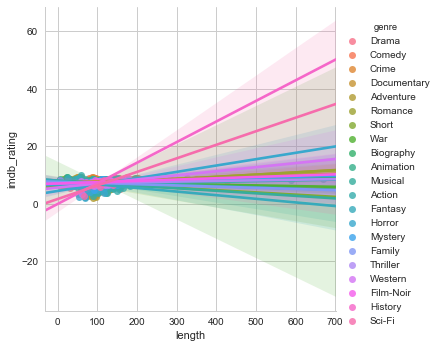

In [49]:
sns.lmplot('length', 'imdb_rating', data=imdb_data, hue = 'genre')

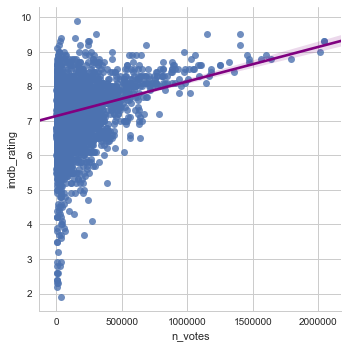

In [51]:
sns.lmplot('n_votes', 'imdb_rating', data=imdb_data, line_kws = {'color':'purple'})

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


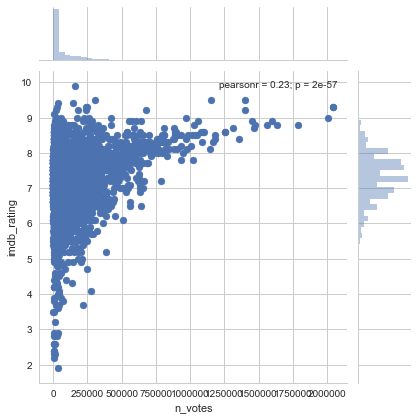

In [52]:
#show jointplot, including histogram juxtaposed with a scatter plot that includes an r coefficient
sns.jointplot(x='n_votes', y='imdb_rating', data = imdb_data)

This correlation doesn't differ substantially from that of the other dataset. There is a positive correlation, but it is quite small. Therefore, higher-rated films might be slightly more popular (judged by the number of IMDB ratings), but the relationship is weak at best.

Finally, let's examine some plots showing the data over time. 

Let's start with films lengths, so we can determine whether films have gotten longer or shorter, on average, over time.

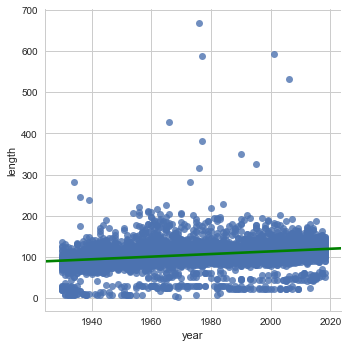

In [57]:
sns.lmplot('year', 'length', data=imdb_data, line_kws = {'color':'green'})

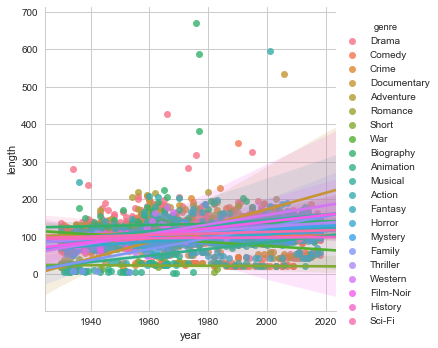

In [64]:
#show scatter plot of movie length over time, compared by genre
sns.lmplot('year', 'length', data=imdb_data, hue='genre')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


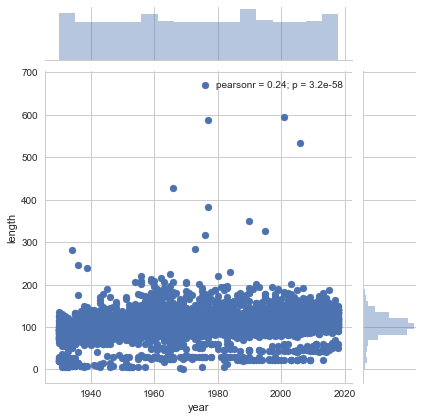

In [55]:
sns.jointplot(x='year', y='length', data = imdb_data)

This is quite similar to the other dataset, with only a slight positive correlation between film length and year. Thus, films have gotten slightly longer over time, but the bulk of the films are still more or less the same length for the 2000s and 2010s relative to earlier decades such as the 1940s, '50s, or '60s.

Film lengths of genres has also remained fairly steady over time.

Finally, let's see whether there is any significant difference in IMDB ratings over time.

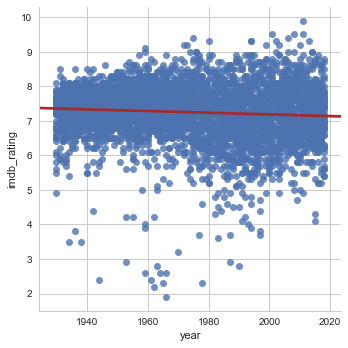

In [61]:
sns.lmplot('year', 'imdb_rating', data=imdb_data, line_kws = {'color':'brown'})

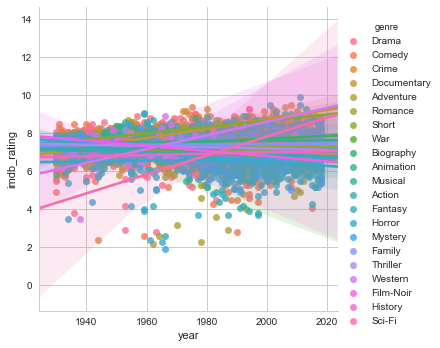

In [65]:
sns.lmplot('year', 'imdb_rating', data=imdb_data, hue='genre')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


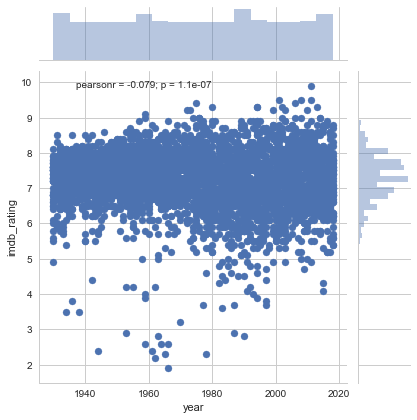

In [62]:
sns.jointplot(x='year', y='imdb_rating', data = imdb_data)

These plots show a very similar correlation relative to the other dataset: there is a very slight negative correlation between IMDB ratings and the year of the films release. 

However, a cursory glance at the earliest 2 decades in the dataset--i.e., films released in the 1930s and 1940s, shows that the highest IMDB ratings in these eras do not quite match the highest-rate films from the 1950s, early 1960s, 1970s, and also the 1990s to 2010s. Overall, of the earlier decades, the 1950s, 1960s, and 1970s tend to have some of the highest-rated films, but ironically they also have some of the lowest-rated films, especially in the mid 1960s to late 1970s. 

IMDB ratings are also quite consistent by genre, but several genres interestingly do show a slight positive correlation as opposed to no correlation or a very slight negative correlation. 

While the data are by no means conclusive, it appears very unlikely that IMDB users (and contemporary film buffs more generally) perceive older films as signficantly better than newer films. Therefore, the perceived quality of films over time has remained fairly steady, with at worst, only a slight reduction in quality, on average. 

In [25]:
#export the data once again, given the signififcant data cleaning performed on it
imdb_data.to_csv('imdb_data_1930_2018.csv')

In [30]:
imdb_data = pd.read_csv('imdb_data_1930_2018.csv')
imdb_data.head(10)

,Unnamed: 0,name,year,length,genre,imdb_rating,n_votes,imdb_ratings_100
0,0,All Quiet on the Western Front,1930,136,Drama,8.1,52716,81
1,1,The Blue Angel,1930,104,Drama,7.8,12138,78
2,2,Animal Crackers,1930,97,Comedy,7.6,12059,76
3,3,L'Age d'Or,1930,63,Comedy,7.4,11235,74
4,4,Murder!,1930,92,Crime,6.4,4954,64
5,5,Morocco,1930,92,Drama,7.2,4746,72
6,6,Hell's Angels,1930,127,Drama,7.7,4372,77
7,7,Earth,1930,75,Drama,7.4,4180,74
8,8,À Propos de Nice,1930,25,Documentary,7.5,3320,75
9,9,The Big Trail,1930,125,Adventure,7.2,2970,72
